# Plot Decoded HGC ROC Data
Launching this jupyter notebook from cmslab1 and making it accessible to your local computer can be done with the help of `ssh`. Essentially, you need to connect a "port" across the ssh connection between your computer and cmslab1 and then you need to tell jupyter notebook to make the interactive-side of the notebook available on that port.

### Outline of Setup Commands
Summarized from [a blog post](https://medium.com/@apbetahouse45/how-to-run-jupyter-notebooks-on-remote-server-part-1-ssh-a2be0232c533).
1. Connect to cmslab1 with a specific port number (run from your laptop): `ssh -L 1234:localhost:1234 cmslab1`
2. Launch the jupyter notebook with the same port number (on cmslab1, assuming already in `ldmx-cob` directory): `jupyter notebook --no-browser --port 1234`
3. Open one of the links provided in your browser on your computer. On my computer (Ubuntu 20.04), you can do this by holding down `Shift` and then right-clicking on the link and selecting `Open link`. You could also hold down `Shift` to highlight the link and the use `Ctrl+Shift+C` to copy the link and then paste it into your browser.

#### Tip
You can avoid having to type the `-L` part every time by adding the `LocalForward 1234 localhost:1234` to your ssh config file.
```
# example ~/.ssh/config
Host cmslab1 :
  User <umn-username>
  HostName cmslab1.spa.umn.edu
  LocalForward 1234 localhost:1234
```

### First Time Operation
This jupyter notebook requires some dependencies available on cmslab1 so that it can run.
Before attempting to connect for the first time, you will need to install these python packages _on cmslab1_.
```
python3 -m pip install --user --upgrade wheel uproot pandas notebook
```

In [2]:
import pandas as pd
import uproot
import matplotlib.pyplot as plt

In [13]:
import os
os.listdir('/home/eichl008/ldmx')

['ldmx-sw',
 '.singularity',
 'ldmx_dev_latest.sif',
 'cob',
 'ldmx-env.sh',
 'pflib',
 'tb-online',
 'lund_8ts.raw',
 'HGCROCSketches',
 'run000011_20220330_115440.raw',
 'charge_20220330_155700.raw',
 'adc_pedestal_20220330_155651.root',
 'adc_charge_20220330_155700.root',
 'adc_pedestal_20220330_145338.root',
 'adc_pedestal_dma.root',
 'pedestal_dma_exitpause.raw',
 'adc_pedestal_dma_exitpause.root',
 'unpacked_pedestal_dma_exitpause.root',
 'adc_pedestal_nondma.root',
 'pedestal_20220330_155651.raw',
 'unpacked_pedestal_20220330_155651.root',
 'unpacked_charge_20220330_155700.root']

In [18]:
# since the notebook is running on cmslab1, you can access the files there
with uproot.open('~/ldmx/adc_charge_20220330_155700.root:ntuplizehgcroc/hgcroc') as t :
    df = t.arrays(library='pd')

In [19]:
df

,raw_id,adc,tot,toa,raw_adc,i_sample,event,tot_prog,tot_comp,fpga,link,channel,index
0,1275077536,0,94,0,0,0,1,False,False,5,0,1,9120
1,1275077536,0,126,0,0,1,1,False,False,5,0,1,9120
2,1275077536,0,124,0,0,2,1,False,False,5,0,1,9120
3,1275077536,0,126,0,0,3,1,False,False,5,0,1,9120
4,1275077536,0,126,0,0,4,1,False,False,5,0,1,9120
...,...,...,...,...,...,...,...,...,...,...,...,...,...
44395,1275077610,80,0,448,80,1,100,False,False,5,1,37,9194
44396,1275077610,80,0,192,80,2,100,False,False,5,1,37,9194
44397,1275077610,80,0,448,80,3,100,False,False,5,1,37,9194
44398,1275077610,80,0,320,80,4,100,False,False,5,1,37,9194


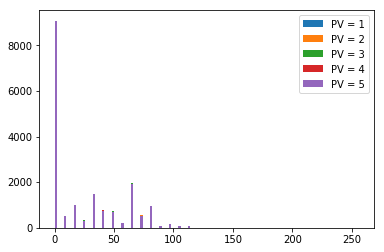

In [23]:
selections = {
    f'PV = {pv}' : (df['event']>i*10)&(df['event']<=(i+1)*10) for i, pv in enumerate(range(1,6,1))
}

for name, sl in selections.items() :
    plt.hist(df[sl]['adc'],range=[0,256],bins=128,label=name)
plt.legend()
plt.show()

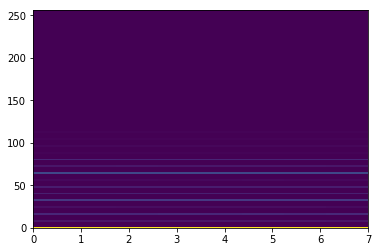

In [18]:
plt.hist2d(df['i_sample'],df['adc'],range=[[0,7],[0,256]],bins=[8,128])
plt.show()

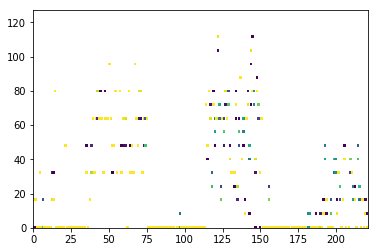

In [17]:
n_channels = len(df['index'].unique())
plt.hist2d(df['index'],df['adc'],bins=[n_channels,128],range=[[0,n_channels-1],[0,127]],cmin=1)
plt.show()